# Import Libraries

In [1]:
# To import Python libraries
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split # Used for supervised machine learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # Used for supervised machine learning
from sklearn.compose import ColumnTransformer # Used for supervised machine learning
from sklearn.linear_model import LogisticRegression # Used for supervised machine learning
from sklearn.tree import DecisionTreeClassifier # Used for supervised machine learning
from sklearn.ensemble import RandomForestClassifier # Used for supervised machine learning
from sklearn.metrics import plot_confusion_matrix # Used for supervised machine learning
from sklearn.impute import SimpleImputer # Used for supervised machine learning

In [2]:
# To load the data
df = pd.read_csv ('bike_buyers.csv') 

In [3]:
for i in range (len(df)):
    if df["Gender"][i]=="Yes":
        #df["Gender"][i]= df.drop(df["Gender"][i])
        print(i)

In [4]:
df["Gender"].value_counts()

Male      500
Female    489
Name: Gender, dtype: int64

In [5]:
# To Visualize Dataset (1st solution)
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [6]:
# To Visualize Dataset (2nd solution)
df = pd.read_csv('bike_buyers.csv').iloc [:,:]
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [7]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

(1000, 13)


In [8]:
# To enable logistic regression, to update purchase bike value to 0 and 1
print("...Purchased bike processing...")
print("...Step 1...")
for i in range (len(df)):
    if df["Purchased Bike"][i] == "No":
        df["Purchased Bike"][i] = 0
    else:
        df["Purchased Bike"][i] = 1
print("...Step 1: DONE!")

...Purchased bike processing...
...Step 1...
...Step 1: DONE!


<ipython-input-8-0874f0bd219f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Purchased Bike"][i] = 0
<ipython-input-8-0874f0bd219f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Purchased Bike"][i] = 1


In [9]:
# Check replacement is indeed done
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,1
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1


# Exploratory Data Analysis (EDA)

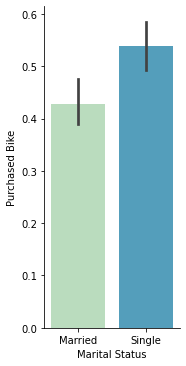

In [10]:
# EDA
# Visualize Marital Status and Purchased Bike
sns.catplot(x="Marital Status", y="Purchased Bike", data = df, kind="bar",aspect = 0.5, palette = "GnBu")

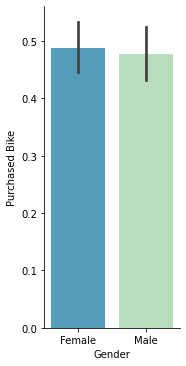

In [11]:
# Visualize Gender and Purchased Bike
sns.catplot(x="Gender", y="Purchased Bike", data = df, kind="bar", aspect = 0.5, palette = "GnBu_r")

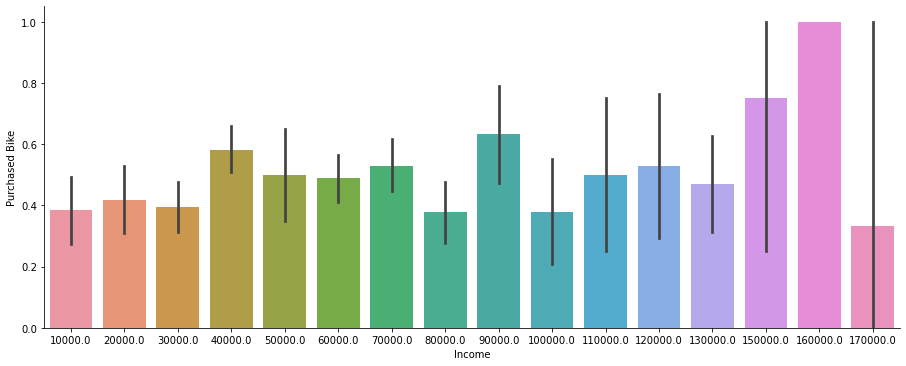

In [12]:
# Visualize Income and Purchased Bike
sns.catplot(x="Income", y="Purchased Bike", data = df, kind="bar", aspect = 2.5)

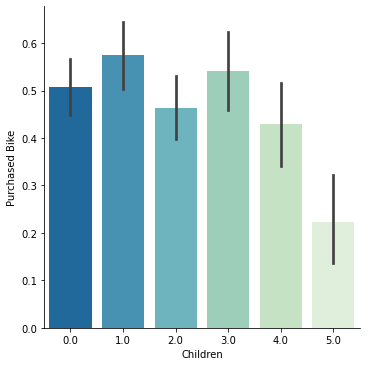

In [13]:
# Visualize Children and Purchased Bike
sns.catplot(x="Children", y="Purchased Bike", data = df, kind="bar", aspect = 1,palette = "GnBu_r")

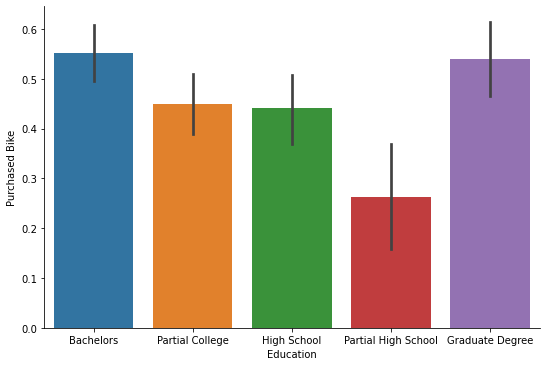

In [14]:
# Visualize Education and Purchased Bike
sns.catplot(x="Education", y="Purchased Bike", data = df, kind="bar", aspect = 1.5)

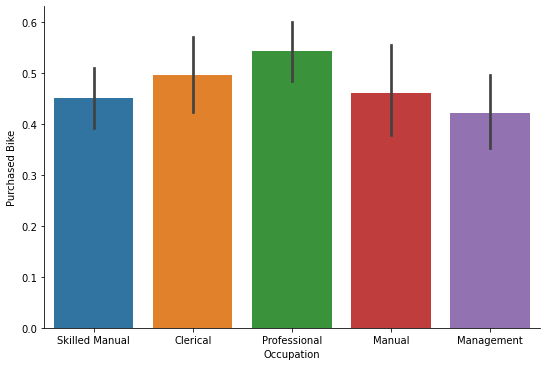

In [15]:
# Visualize Occupation and Purchased Bike
sns.catplot(x="Occupation", y="Purchased Bike", data = df, kind="bar", aspect = 1.5)

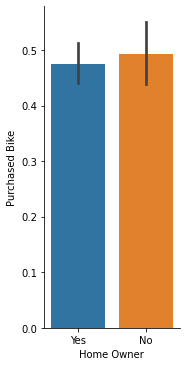

In [16]:
# Visualize Home Owner and Purchased Bike
sns.catplot(x="Home Owner", y="Purchased Bike", data = df, kind="bar", aspect = 0.5)

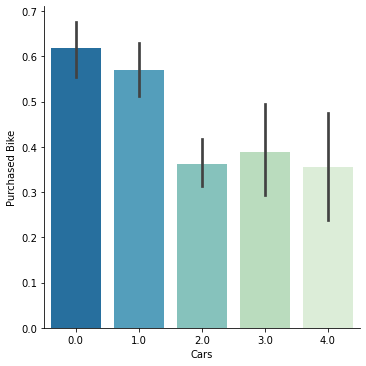

In [17]:
# Visualize Cars and Purchased Bike
sns.catplot(x="Cars", y="Purchased Bike", data = df, kind="bar", aspect = 1, palette = "GnBu_r")

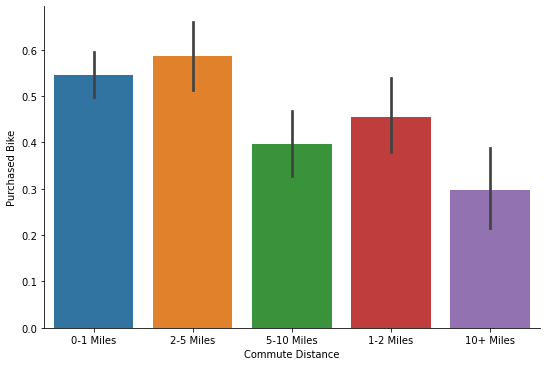

In [18]:
# Visualize Commute Distance and Purchased Bike
sns.catplot(x="Commute Distance", 
            y="Purchased Bike", 
            data = df,
            kind="bar", 
            aspect = 1.5)

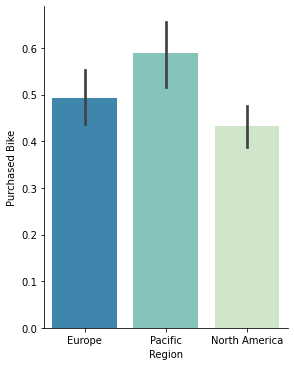

In [19]:
# Visualize Region and Purchased Bike
sns.catplot(x="Region", y="Purchased Bike", data = df, kind="bar", aspect = 0.8, palette = "GnBu_r")

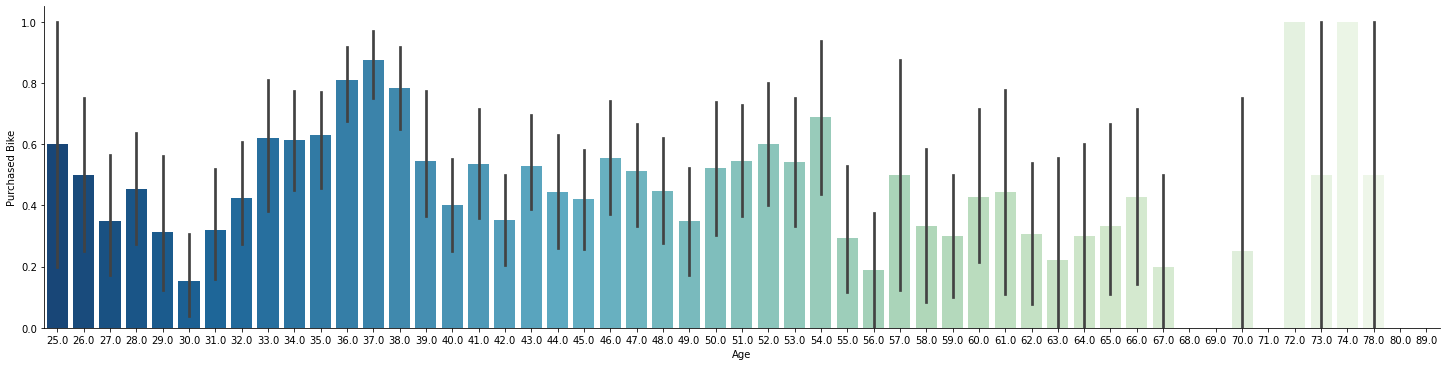

In [20]:
# Visualize Age and Purchased Bike
sns.catplot(x="Age", y="Purchased Bike", data = df, kind="bar", aspect = 4, palette = "GnBu_r")

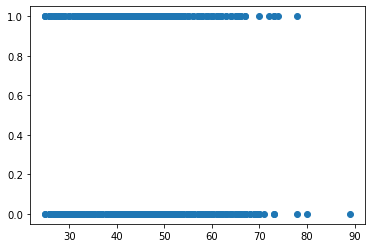

In [21]:
# Visualize Age and Purchased Bike v2
plt.scatter(df['Age'],df['Purchased Bike'])

In [22]:
# Describe dataset's main statistics
print(df.describe(include="all")) # all pour tout faire afficher

                  ID Marital Status Gender         Income    Children  \
count    1000.000000            993    989     994.000000  992.000000   
unique           NaN              2      2            NaN         NaN   
top              NaN        Married   Male            NaN         NaN   
freq             NaN            535    500            NaN         NaN   
mean    19965.992000            NaN    NaN   56267.605634    1.910282   
std      5347.333948            NaN    NaN   31067.817462    1.626910   
min     11000.000000            NaN    NaN   10000.000000    0.000000   
25%     15290.750000            NaN    NaN   30000.000000    0.000000   
50%     19744.000000            NaN    NaN   60000.000000    2.000000   
75%     24470.750000            NaN    NaN   70000.000000    3.000000   
max     29447.000000            NaN    NaN  170000.000000    5.000000   

        Education    Occupation Home Owner        Cars Commute Distance  \
count        1000          1000        996  991.

In [23]:
print(df.describe())

                 ID         Income    Children        Cars         Age
count   1000.000000     994.000000  992.000000  991.000000  992.000000
mean   19965.992000   56267.605634    1.910282    1.455096   44.181452
std     5347.333948   31067.817462    1.626910    1.121755   11.362007
min    11000.000000   10000.000000    0.000000    0.000000   25.000000
25%    15290.750000   30000.000000    0.000000    1.000000   35.000000
50%    19744.000000   60000.000000    2.000000    1.000000   43.000000
75%    24470.750000   70000.000000    3.000000    2.000000   52.000000
max    29447.000000  170000.000000    5.000000    4.000000   89.000000


In [24]:
# Check if there any null value in the data
df.isnull().any()

ID                  False
Marital Status       True
Gender               True
Income               True
Children             True
Education           False
Occupation          False
Home Owner           True
Cars                 True
Commute Distance    False
Region              False
Age                  True
Purchased Bike      False
dtype: bool

In [25]:
df.isnull()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,True,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


# Preprocessing

In [26]:
# Preprocessing

# Separate target variable Y from features X
print("Separating target variable from features...")

# Choose the columns you want to have as your features
features_list = ['Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Purchased Bike"] # We set "Profit" as the target variable

print("...Done...")
print()

Separating target variable from features...
...Done...



In [27]:
# Preview columns names to facilitate step above
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [28]:
# Divide dataset Train set & Test set 
# First we import train_test_split

print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")

Splitting dataset into train set and test set...
...Done.


In [29]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [30]:
# Imput missing values

# Copy X_train to avoid caveats
#X_train = X_train.copy()

# Create an imputer for numerical columns 
numerical_imputer = SimpleImputer(strategy="median")

# Apply it on "Income", "Children", "Cars", "Age" columns. Careful, we used X[["Income"]] and remaining columns on purpose to get a 2D array instead of 1D
X_train[["Income"]] = numerical_imputer.fit_transform(X_train[["Income"]])
X_train[["Children"]] = numerical_imputer.fit_transform(X_train[["Children"]])
X_train[["Cars"]] = numerical_imputer.fit_transform(X_train[["Cars"]])
X_train[["Age"]] = numerical_imputer.fit_transform(X_train[["Age"]])

# Create categorical imputer 
categorical_imputer = SimpleImputer(strategy="most_frequent") # We can use strategy="constant". If “constant”, then replace missing values with fill_value. 
                                                                                # along with fill_value 
                                                                                # to replace NaN 
                                                                                # by whatever is inside fill_value
                                                                                # If “most_frequent”, then replace missing using the most frequent value along each column

# Apply it on "Marital Status", "Gender", "Home Owner" columns. Careful, we used X[["Marital status"]] and remaining columns on purpose to get a 2D array instead of 1D
X_train[["Marital Status"]] = categorical_imputer.fit_transform(X_train[["Marital Status"]])
X_train[["Gender"]] = categorical_imputer.fit_transform(X_train[["Gender"]])
X_train[["Home Owner"]] = categorical_imputer.fit_transform(X_train[["Home Owner"]])

X_train.isnull().any()

<ipython-input-30-af9335c1c2ee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["Income"]] = numerical_imputer.fit_transform(X_train[["Income"]])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-30-af9335c1c2ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Marital Status      False
Gender              False
Income              False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
dtype: bool

In [31]:
features_list

['Marital Status',
 'Gender',
 'Income',
 'Children',
 'Education',
 'Occupation',
 'Home Owner',
 'Cars',
 'Commute Distance',
 'Region',
 'Age']

In [32]:
# Make all the required preprocessings on the train set
# X_train
print("#### X_train BEFORE preprocessing ####")
print("Encoding categorical features and standardizing numerical features...")

numeric_features = [2, 3, 7, 10] 
numeric_transformer = StandardScaler()

categorical_features = [0, 1, 4, 5, 6, 8, 9] 
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

# Encoding labels
print("#### y_train BEFORE preprocessing #### - Encoding labels...")
print(y_train)
print()
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
print("...#### y_train AFTER preprocessing ####...")
print(y_train[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.          1.          0.          1.          1.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          1.
  -0.52263902  0.04443387  0.50053348  1.63439506]
 [ 0.          1.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.          1.          0.          1.          0.
  -0.85290064 -1.18132795 -0.40132865 -1.42320244]
 [ 1.          0.          0.          1.          1.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   1.          0

In [33]:
# Create your Logistic Regression model

# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [34]:
X_test

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
81,Single,Female,10000.0,4.0,Partial High School,Manual,Yes,2.0,0-1 Miles,Europe,40.0
889,Married,Female,70000.0,1.0,Graduate Degree,Skilled Manual,Yes,0.0,0-1 Miles,North America,35.0
271,Single,Female,20000.0,0.0,High School,Manual,No,1.0,1-2 Miles,Europe,28.0
410,Married,Female,20000.0,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,46.0
415,Married,Female,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0
...,...,...,...,...,...,...,...,...,...,...,...
760,Single,Male,20000.0,3.0,Partial High School,Clerical,No,2.0,0-1 Miles,North America,50.0
676,Married,Male,40000.0,2.0,Partial College,Clerical,Yes,1.0,0-1 Miles,North America,47.0
524,Single,Female,80000.0,4.0,Graduate Degree,Management,Yes,2.0,5-10 Miles,North America,67.0
172,Married,Male,10000.0,0.0,Partial High School,Manual,No,2.0,0-1 Miles,Europe,33.0


In [35]:
# Evaluate it (don't forget to preprocess X_test) (logistic regression)

# Imput missing values for X_test

# Copy X_test to avoid caveats
#X_test = X_test.copy()

# Create an imputer for numerical columns 
# numerical_imputer = SimpleImputer(strategy="median") >> to remove in order to ensure it uses the same transformation as for X_train

# Apply it on "Income", "Children", "Cars", "Age" columns. Careful, we used X[["Income"]] and remaining columns on purpose to get a 2D array instead of 1D
X_test[["Income"]] = numerical_imputer.transform(X_test[["Income"]])
X_test[["Children"]] = numerical_imputer.transform(X_test[["Children"]])
X_test[["Cars"]] = numerical_imputer.transform(X_test[["Cars"]])
X_test[["Age"]] = numerical_imputer.transform(X_test[["Age"]])

# Create categorical imputer 
# categorical_imputer = SimpleImputer(strategy="most_frequent") #>> to remove in order to ensure it uses the same transformation as for X_train

# Apply it on "Marital Status", "Gender", "Home Owner" columns. Careful, we used X[["Marital status"]] and remaining columns on purpose to get a 2D array instead of 1D
X_test["Home Owner"] = categorical_imputer.transform(X_test[["Home Owner"]])
X_test["Marital Status"] = categorical_imputer.transform(X_test[["Marital Status"]])
X_test["Gender"] = categorical_imputer.transform(X_test[["Gender"]])


X_test.isnull().any()

<ipython-input-35-ab50a95fe491>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[["Income"]] = numerical_imputer.transform(X_test[["Income"]])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-35-ab50a95fe491>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Marital Status      False
Gender              False
Income              False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
dtype: bool

In [36]:
mask = X_test[X_test['Gender'] == 'Yes']

In [37]:
mask

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
908,Single,Yes,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0


In [38]:
#X_test['Gender'][908] = 'Female' 

In [39]:
#X_test["Gender"].value_counts()

In [40]:
# Make all the required preprocessings on the test set
# X_test
print("#### X_test BEFORE preprocessing ####")
print("Encoding categorical features and standardizing numerical features...test set")

print("#### X_test BEFORE preprocessing ####")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)
#print("...Done.")
print("#### X_test AFTER preprocessing ####")
print(X_test)
print()

# Encoding labels
print("#### y_train BEFORE preprocessing #### - Encoding labels...")
print(y_test)
print()
#labelencoder_test = LabelEncoder()
y_test = labelencoder.transform(y_test)
print("...#### y_train AFTER preprocessing ####...")
print(y_test)
print()

#### X_test BEFORE preprocessing ####
Encoding categorical features and standardizing numerical features...test set
#### X_test BEFORE preprocessing ####
    Marital Status  Gender   Income  Children            Education  \
81          Single  Female  10000.0       4.0  Partial High School   
889        Married  Female  70000.0       1.0      Graduate Degree   
271         Single  Female  20000.0       0.0          High School   
410        Married  Female  20000.0       2.0      Partial College   
415        Married  Female  80000.0       5.0      Graduate Degree   
..             ...     ...      ...       ...                  ...   
760         Single    Male  20000.0       3.0  Partial High School   
676        Married    Male  40000.0       2.0      Partial College   
524         Single  Female  80000.0       4.0      Graduate Degree   
172        Married    Male  10000.0       0.0  Partial High School   
788         Single  Female  20000.0       2.0  Partial High School   

     

# Conclusion

## Score

In [41]:
print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

Train score:  0.665
Test score:  0.615


In [42]:
# Conclusion: Performance seems to be quite low using logistic regression

--- Assessment of performances---
---logistic regression---


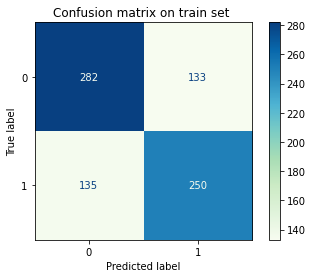

accuracy-score on train set :  0.665


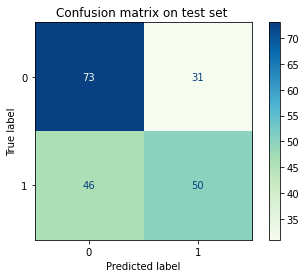

accuracy-score on test set :  0.615


In [43]:
# Create a confusion matrix (logistic regression)

### Assessment of performances ###
print("--- Assessment of performances---")
print("---logistic regression---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train,cmap = plt.cm.GnBu)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))

cm = plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.GnBu)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [44]:
# Check coefficients (pre-step)

classifier.coef_[0].squeeze()

array([-0.37274736,  0.3727752 , -0.00856497,  0.00859281,  0.14466232,
       -0.08838471,  0.42185801, -0.15564275, -0.32246504,  0.16209274,
       -0.23338907, -0.04558036,  0.25920464, -0.14230011, -0.17869072,
        0.17871856,  0.3621755 ,  0.11187894, -0.64096902,  0.39155064,
       -0.22460823, -0.32698925, -0.25325394,  0.58027103,  0.43425419,
       -0.23297147, -0.44772183,  0.05029969])

In [45]:
print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_

flat_cat_features = [item for array in categorical_column_names for item in array]
print("Categorical columns are: ", flat_cat_features)

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = np.append(flat_cat_features, numerical_column_names)
print("All column names are: ",all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.coef_[0].squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})

coefficients are:  [[-0.37274736  0.3727752  -0.00856497  0.00859281  0.14466232 -0.08838471
   0.42185801 -0.15564275 -0.32246504  0.16209274 -0.23338907 -0.04558036
   0.25920464 -0.14230011 -0.17869072  0.17871856  0.3621755   0.11187894
  -0.64096902  0.39155064 -0.22460823 -0.32698925 -0.25325394  0.58027103
   0.43425419 -0.23297147 -0.44772183  0.05029969]]
Constant is:  [-0.17231557]
All transformers are:  [('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), [0, 1, 4, 5, 6, 8, 9]), ('num', StandardScaler(), [2, 3, 7, 10])]
One Hot Encoder transformer is:  OneHotEncoder(handle_unknown='ignore', sparse=False)
Categorical columns are:  ['Married', 'Single', 'Female', 'Male', 'Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School', 'Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual', 'No', 'Yes', '0-1 Miles', '1-2 Miles', '10+ Miles', '2-5 Miles', '5-10 Miles', 'Europe', 'North America', 'Pacific']
numerical columns are:  I

In [46]:
feature_importance

,feature_names,coefficients
0,Married,-0.372747
1,Single,0.372775
2,Female,-0.008565
3,Male,0.008593
4,Bachelors,0.144662
5,Graduate Degree,-0.088385
6,High School,0.421858
7,Partial College,-0.155643
8,Partial High School,-0.322465
9,Clerical,0.162093


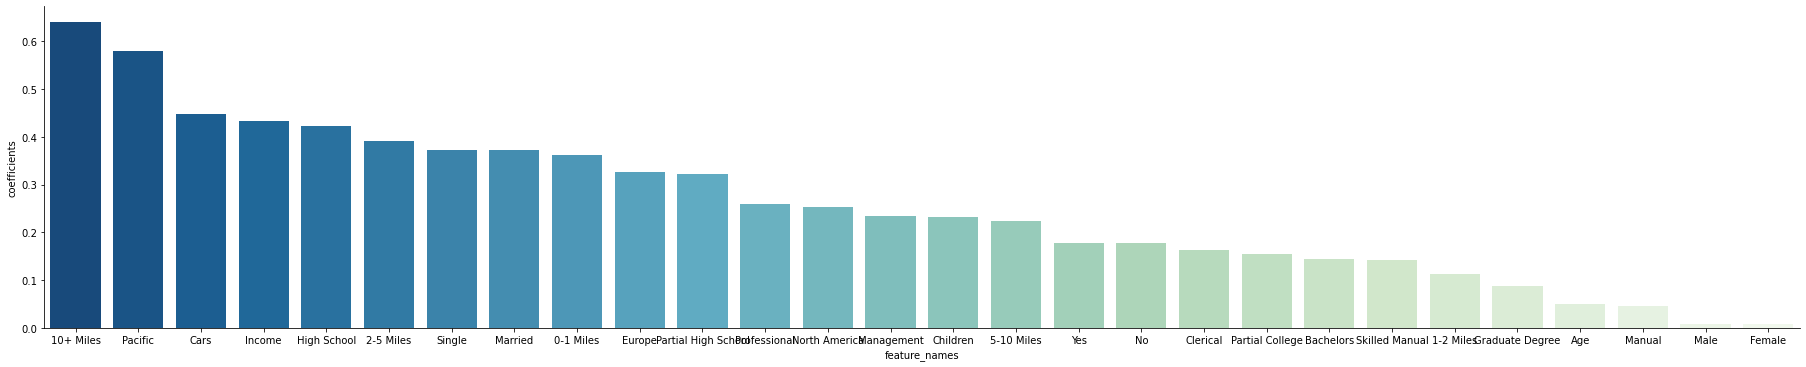

In [47]:
# Visualize using seaborn (logistic regression)

# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=5, 
            palette = "GnBu_r")

In [48]:
# Build a Decision Tree

# Training model
# on crée une enveloppe et on attribue un set de valeurs
print("Training model...")
classifier = DecisionTreeClassifier(
            max_depth = 120,
            min_samples_split = 60
)
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [49]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [50]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---Decision Tree


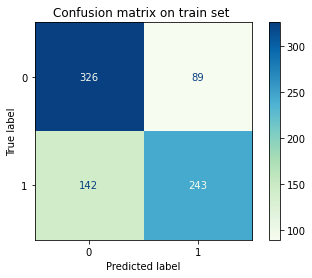

accuracy-score on train set :  0.71125


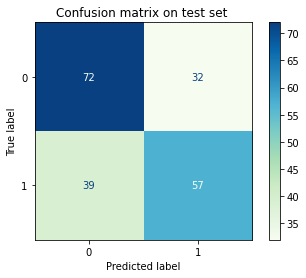

accuracy-score on test set :  0.645


In [51]:
# Evaluate your model (decision tree)

### Assessment of performances ###
print("--- Assessment of performances ---Decision Tree")


# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train, cmap = plt.cm.GnBu)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.GnBu)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [52]:
# Feature importance (Decision Tree)
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
})
feature_importance

,feature_names,coefficients
0,Married,0.023722
1,Single,0.000000
2,Female,0.000000
3,Male,0.000000
4,Bachelors,0.000000
5,Graduate Degree,0.000000
6,High School,0.030137
7,Partial College,0.041126
8,Partial High School,0.000000
9,Clerical,0.019294


Features Importance - decision tree


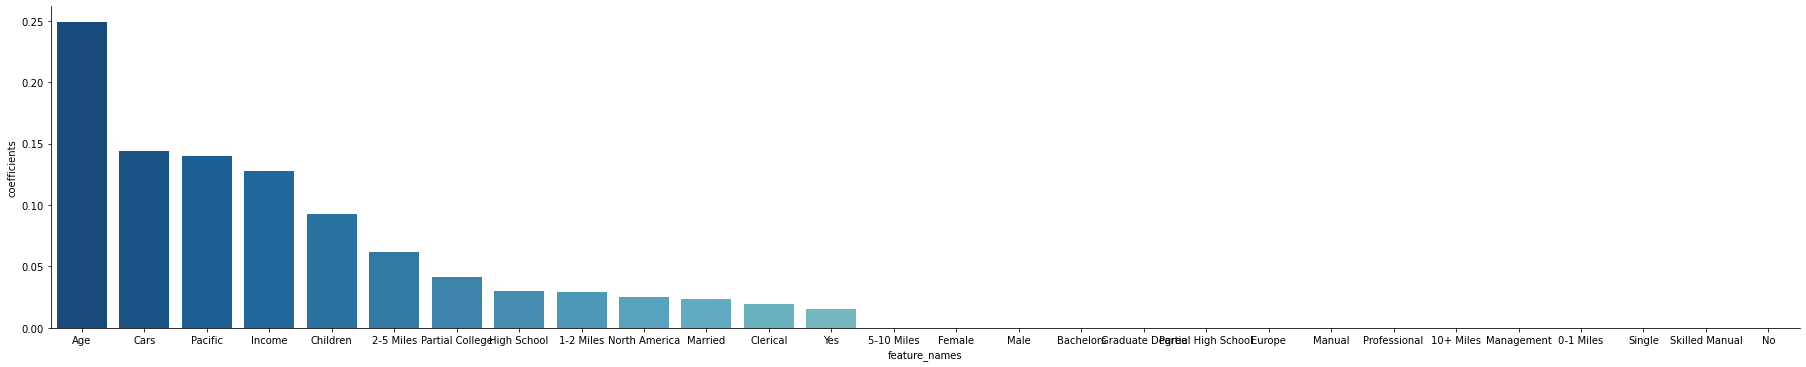

In [53]:
# Visualize ranked features using seaborn

print("Features Importance - decision tree")
      
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=5,
            palette = "GnBu_r")

In [54]:
# Random Forests

# Training model
print("Training model...")
classifier = RandomForestClassifier(
    n_estimators = 60,
    max_depth = 200,
    min_samples_leaf =20
)#on instancie un nouvel objet qui est classifié
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [55]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [56]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---random forest


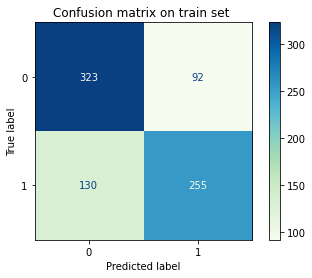

accuracy-score on train set :  0.7225


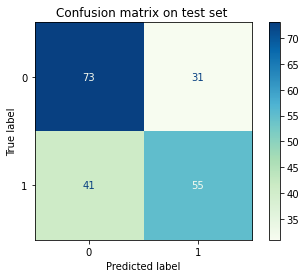

accuracy-score on test set :  0.64


In [57]:
# Evaluate your model (random forest)

### Assessment of performances ###
print("--- Assessment of performances ---random forest")


# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train, cmap = plt.cm.GnBu)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test,cmap = plt.cm.GnBu)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [58]:
# Feature importance (random forest)
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,Married,0.042446
1,Single,0.067293
2,Female,0.014468
3,Male,0.016441
4,Bachelors,0.023304
5,Graduate Degree,0.006451
6,High School,0.006517
7,Partial College,0.024056
8,Partial High School,0.021374
9,Clerical,0.012914


Features Importance - random forest


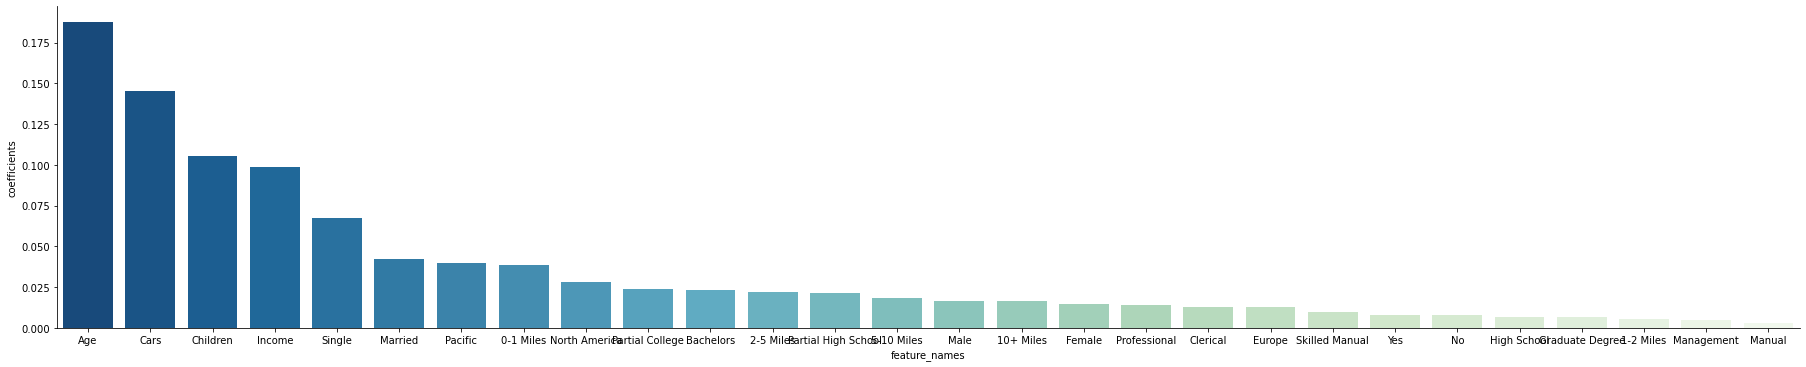

In [59]:
# Visualize ranked features using seaborn
print("Features Importance - random forest")

sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=5,
            palette = "GnBu_r")